In [1]:
import keras 
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
train = np.load('train.npy', allow_pickle=True)
size = 50

In [3]:
x_train = []
y_train = []

In [4]:
for i, j in train:
  x_train.append(i)
  y_train.append(j)

In [5]:
del train

In [6]:
x_train = np.array(x_train)
x_train = x_train/255.0
x_train = x_train.reshape(-1, size, size, 1)

In [7]:
y_train = np.array(y_train)

In [8]:
model = keras.Sequential()

In [9]:

#Conv
model.add(keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(size, size, 1)))

#Pooling: Agrupamento. Reduz o mapa de features resultante
model.add(keras.layers.MaxPool2D(2,2))

#Conv
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))

#Pooling: Agrupamento. Reduz o mapa de features resultante
model.add(keras.layers.MaxPool2D(2,2))

#Conv
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))

#Pooling: Agrupamento. Reduz o mapa de features resultante
model.add(keras.layers.MaxPool2D(2,2))


#Flatten: Achatamento. Converte a estrutura 2D em 1D
model.add(keras.layers.Flatten())

#Fully Conected
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

In [10]:
callback = keras.callbacks.EarlyStopping(patience=2)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30, shuffle=True, verbose=2, batch_size=16, callbacks=[callback])

Epoch 1/30
50/50 - 5s - loss: 1.0625 - accuracy: 0.4212
Epoch 2/30
50/50 - 5s - loss: 0.6998 - accuracy: 0.6950
Epoch 3/30
50/50 - 5s - loss: 0.4347 - accuracy: 0.8487
Epoch 4/30
50/50 - 5s - loss: 0.3908 - accuracy: 0.8562
Epoch 5/30
50/50 - 6s - loss: 0.3195 - accuracy: 0.8838
Epoch 6/30
50/50 - 6s - loss: 0.3196 - accuracy: 0.8750
Epoch 7/30
50/50 - 5s - loss: 0.2458 - accuracy: 0.9100
Epoch 8/30
50/50 - 5s - loss: 0.2276 - accuracy: 0.9162
Epoch 9/30
50/50 - 5s - loss: 0.1574 - accuracy: 0.9400
Epoch 10/30
50/50 - 5s - loss: 0.1340 - accuracy: 0.9538
Epoch 11/30
50/50 - 5s - loss: 0.1242 - accuracy: 0.9588
Epoch 12/30
50/50 - 5s - loss: 0.1054 - accuracy: 0.9600
Epoch 13/30
50/50 - 5s - loss: 0.0859 - accuracy: 0.9675
Epoch 14/30
50/50 - 5s - loss: 0.0881 - accuracy: 0.9700
Epoch 15/30
50/50 - 5s - loss: 0.0852 - accuracy: 0.9675
Epoch 16/30
50/50 - 5s - loss: 0.0472 - accuracy: 0.9812
Epoch 17/30
50/50 - 5s - loss: 0.0696 - accuracy: 0.9737
Epoch 18/30
50/50 - 5s - loss: 0.0723 - 

In [11]:
test = np.load('test.npy', allow_pickle=True)

In [12]:
x_test = []
y_test = []

for i, j in test:
  x_test.append(i)
  y_test.append(j)

x_test = np.array(x_test)
x_test = x_test/255.0
x_test = x_test.reshape(-1, size, size, 1)

y_test = np.array(y_test)

In [13]:
output_nn = model.predict_classes(x_test)
output_nn

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2],
      dtype=int64)

In [14]:
teste = model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 52ms/step - loss: 0.2508 - accuracy: 0.9474


<AxesSubplot:>

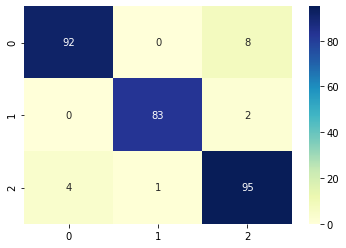

In [15]:
matriz_confusão = confusion_matrix(y_test, output_nn)
#matriz_confusão
sns.heatmap(matriz_confusão, annot=True, cmap='YlGnBu', fmt="d")

In [16]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, output_nn)))


Accuracy: 0.95



In [17]:
print('Macro Precision: {:.2f}'.format(precision_score(y_test, output_nn, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, output_nn, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, output_nn, average='macro')))

Macro Precision: 0.95
Macro Recall: 0.95
Macro F1-score: 0.95

